This notebook takes two hardcoded inputs - secret santa players and their preference for other members. It outputs an assignment as well as some interesting statistical plots - both found at the end of the notebook.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Static Vars
members = ['Vincent', 'Tom', 'Michael', 'Leslie', 'Ming', 'Jon', 'Jen', 'Basil', 'Jeff', 'Angela']
exclusions = dict.fromkeys(members)
for member in members: exclusions[member] = [member]
exclusions['Vincent'] += ['Michael', 'Jeff', 'Tom'] # This means Vincent does not want to receive Michael, Jeff, or Tom
exclusions['Angela'] += ['Jen'] 
exclusions['Jen'] += ['Angela']
exclusions['Tom'] += ['Vincent', 'Michael', 'Leslie', 'Ming', 'Jon']
exclusions

{'Angela': ['Angela', 'Jen'],
 'Basil': ['Basil'],
 'Jeff': ['Jeff'],
 'Jen': ['Jen', 'Angela'],
 'Jon': ['Jon'],
 'Leslie': ['Leslie'],
 'Michael': ['Michael'],
 'Ming': ['Ming'],
 'Tom': ['Tom', 'Vincent', 'Michael', 'Leslie', 'Ming', 'Jon'],
 'Vincent': ['Vincent', 'Michael', 'Jeff', 'Tom']}

In [3]:
def assign(members, exclusions):
    assignments = dict.fromkeys(members) #Key: Giver, Value: Receiver
    receivers = list(members)
    givers = list(members)
    while len(givers) > 0:
        giver = random.choice(givers)
        givers.remove(giver)
        candidate_receivers = list(receivers)
        for invalid_receiver in exclusions[giver]: 
            if invalid_receiver in candidate_receivers: # .remove cannot handle missing elements
                candidate_receivers.remove(invalid_receiver)
        if len(candidate_receivers) == 0: return {} #Invalid Assignment, last person gets themselves
        recipient = random.choice(candidate_receivers)
        assignments[giver] = recipient
        receivers.remove(recipient)
    return assignments


In [4]:
assignment_df = pd.DataFrame()
for step in range(50000):
    santa_assignments = assign(members, exclusions)
    if len(set(santa_assignments.values())) == len(members): #Valid Assignment
        to_append = pd.DataFrame()
        to_append['giver'] = list(santa_assignments)
        to_append['receiver'] = santa_assignments.values()
        assignment_df = assignment_df.append(to_append)

In [5]:
assignment_counts = assignment_df.groupby(['giver', 'receiver']).agg(len)

How to read plots: 'Name' of giver is printed. Followed by probability of recepient as line plot and then a distribution.

Vincent


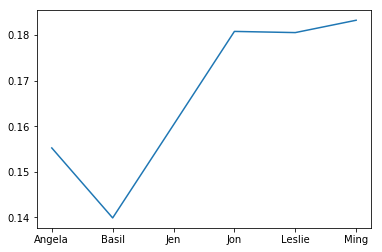

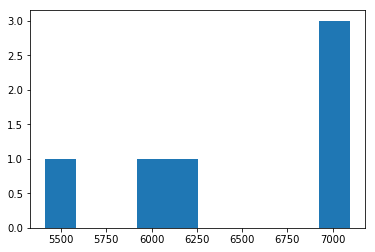

Tom


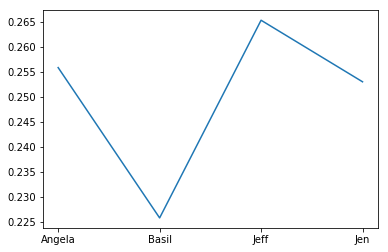

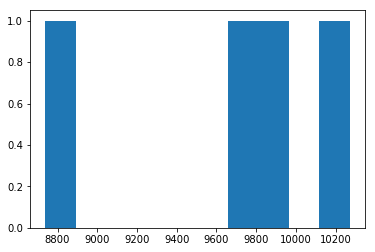

Michael


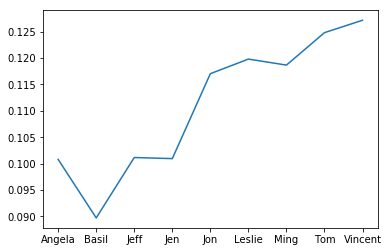

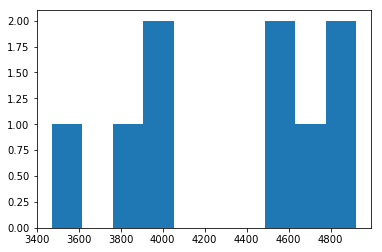

Leslie


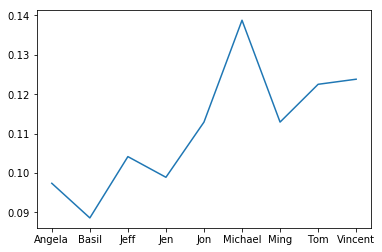

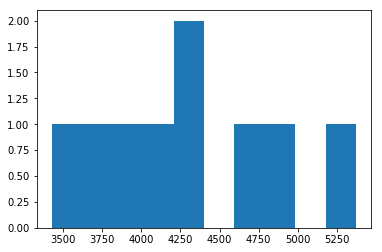

Ming


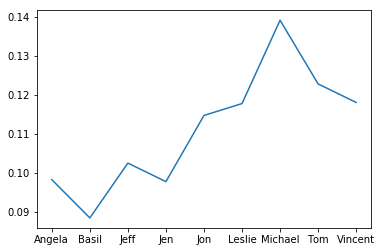

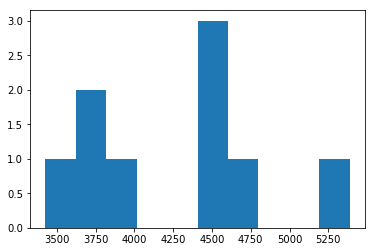

Jon


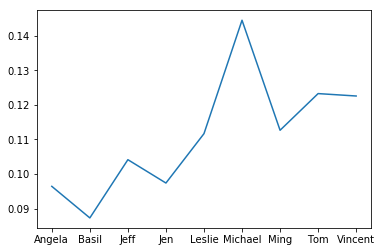

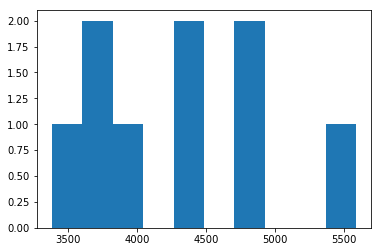

Jen


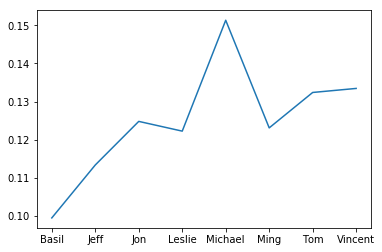

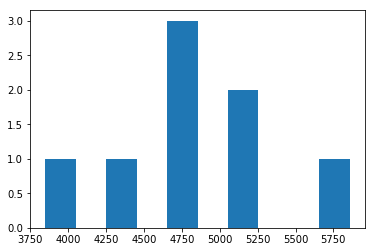

Basil


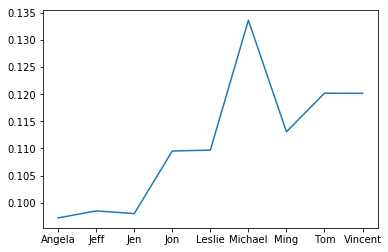

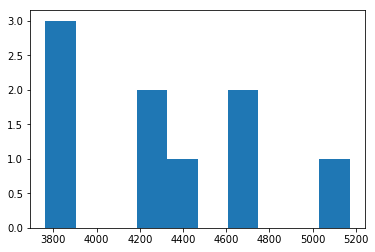

Jeff


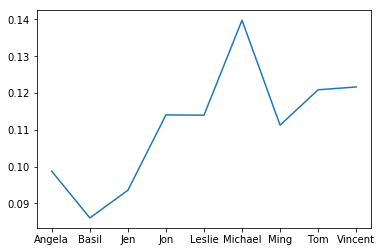

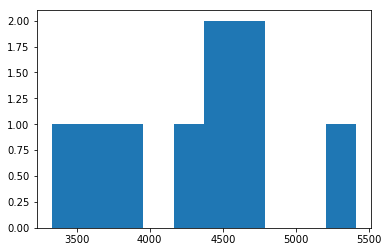

Angela


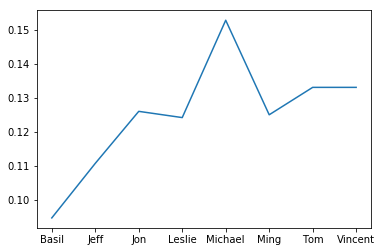

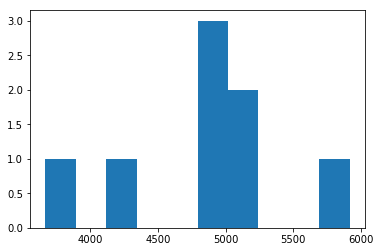

In [6]:
for member in members:
    print member
    plt.plot(range(len(assignment_counts[member].index)),1.0 * assignment_counts[member] / sum(assignment_counts[member]))
    plt.xticks(range(len(assignment_counts[member].index)),list(assignment_counts[member].index))
    plt.show()
    plt.hist(assignment_counts[member])
    plt.show()

In [7]:
assignment_df.head(10)

,giver,receiver
0,Jeff,Ming
1,Michael,Basil
2,Angela,Jeff
3,Ming,Leslie
4,Leslie,Jon
5,Tom,Jen
6,Basil,Michael
7,Vincent,Angela
8,Jen,Tom
9,Jon,Vincent
